In [5]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# 문장 -> 숫자(벡터화) : embedding
# 수익률 예측

In [6]:
#from google.colab import files
#uploaded = files.upload()

In [7]:
df = pd.read_csv('sbux.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [3]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [8]:
# Start by doing the WRONG thing - trying to predict the price itself
# 종가 데이터를 series 형태로
series = df['close'].values.reshape(-1, 1)
series

array([[28.185],
       [28.07 ],
       [28.13 ],
       ...,
       [54.69 ],
       [55.61 ],
       [54.46 ]])

In [11]:
# Normalize the data(standard scaler - 평균 : 0, 표준편차 : 1)
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series)]) # 크기를 fit 해줌.(len()을 사용하는 이유는 밑에서 flatten을 사용해 차원을 1차원으로 만들어주기 위해.)
series = scaler.transform(series).flatten() # 그리고 series를 scaler(정규화).
series

array([-1.94144714, -1.95251788, -1.94674184, ...,  0.61011874,
        0.6986847 ,  0.58797726])

In [13]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [14]:
len(X)

1249

In [15]:
X = np.array(X)
X.shape

(1249, 10)

In [16]:
X = np.array(X).reshape(-1, T, 1)
X.shape

(1249, 10, 1)

In [17]:
Y = np.array(Y)
N = len(X)
print(f'X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}')

X.shape:(1249, 10, 1), Y.shape:(1249,), N.length:1249


In [18]:
### try autoregressive RNN model
i = Input(shape = (T, 1)) # feature가 1개. - 주식
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss = 'mse', optimizer = Adam(lr = 0.1), 
              metrics = ['accuracy'])

# train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 100,
             validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/100


C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 1s 19ms/step - loss: 0.1772 - accuracy: 0.0000e+00 - val_loss: 0.1107 - val_accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 0.0000e+00 - val_loss: 0.0273 - val_accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0246 - val_accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0165 - val_accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0166 - val_accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.

Epoch 56/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 57/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 58/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 59/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0073 - val_accuracy: 0.0000e+00
Epoch 60/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 61/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0164 - val_accuracy: 0.0000e+00
Epoch 62/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 0.0000e

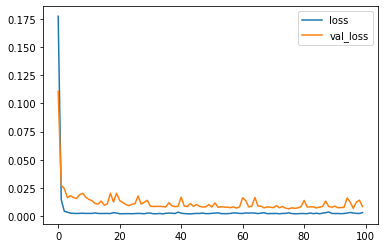

In [19]:
# plot accuracy per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

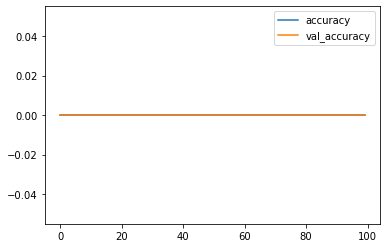

In [20]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [21]:
# One-step forecast using true targets(예측할 데이터 값)
predicts = model.predict(X)
predicts.shape

(1249, 1)

In [22]:
final_predictions = predicts[:, 0]

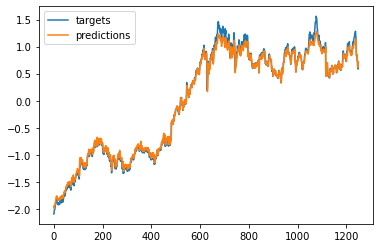

In [23]:
# forecast graph
plt.plot(Y, label = 'targets')
plt.plot(final_predictions, label = 'predictions')
plt.legend()
plt.show()

In [25]:
# Multi-step forecast(time sequences)
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]

# 진짜 데이터 수보다 많이 예측할 필요가 없으니까,,
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0, 0]
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1) # time sequences
    last_x[-1] = p

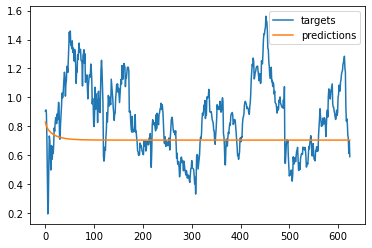

In [26]:
# forecast graph
plt.plot(validation_target, label = 'targets')
plt.plot(validation_predictions, label = 'predictions')
plt.legend()
plt.show()

In [ ]:
# 잘못 예측했으니 수익률을 가지고 예측하자.

In [27]:
# calculate returns by first shifting the data
df['PrevClose'] = df['close'].shift(1) # 1칸씩 다음 칸으로 이동.

# so now it's like
# close / prev close
# x[2] x[1]
# x[3] x[2]
# x[4] x[3]
# ...
# x[t] x[t-1]

In [28]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [29]:
# then the return is (수익률)
# (x[t] - x[t-1]) / x[t-1]
df['return'] = (df['close'] - df['PrevClose']) / df['PrevClose'] 

In [30]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<AxesSubplot:>

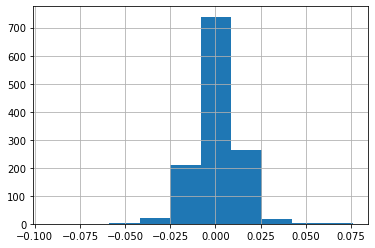

In [31]:
# Now let's try an LSTM to predict returns
df['return'].hist()

In [ ]:
# +의 수익률이 -의 수익률보다 많다.

In [32]:
series = df['return'].values[1:].reshape(-1, 1)

# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series)])
series = scaler.transform(series).flatten()
series

array([-0.37879654,  0.12441548, -0.66715001, ..., -1.61585067,
        1.31287055, -1.72223474])

In [33]:
### build the dataset
# let's see if we can use T past values to predict the next value

T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)    
Y = np.array(Y)
N = len(X)
print(f'X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}')

X.shape:(1248, 10, 1), Y.shape:(1248,), N.length:1248


In [34]:
### try autoregressive RNN model

i = Input(shape = (T, 1)) # feature가 1개. - 주식
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss = 'mse', optimizer = Adam(lr = 0.1), 
              metrics = ['accuracy'])

# train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 100,
             validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/100


C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 1s 20ms/step - loss: 0.9484 - accuracy: 0.0000e+00 - val_loss: 1.1323 - val_accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9371 - accuracy: 0.0000e+00 - val_loss: 1.0900 - val_accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9233 - accuracy: 0.0000e+00 - val_loss: 1.1403 - val_accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9295 - accuracy: 0.0000e+00 - val_loss: 1.1795 - val_accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9403 - accuracy: 0.0000e+00 - val_loss: 1.1107 - val_accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9245 - accuracy: 0.0000e+00 - val_loss: 1.1019 - val_accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9290 - accuracy: 0.0000e+00 - val_loss: 1.

Epoch 56/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8911 - accuracy: 0.0000e+00 - val_loss: 1.1255 - val_accuracy: 0.0000e+00
Epoch 57/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8855 - accuracy: 0.0000e+00 - val_loss: 1.1587 - val_accuracy: 0.0000e+00
Epoch 58/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8801 - accuracy: 0.0000e+00 - val_loss: 1.1603 - val_accuracy: 0.0000e+00
Epoch 59/100
20/20 [==============================] - 0s 6ms/step - loss: 0.9072 - accuracy: 0.0000e+00 - val_loss: 1.1679 - val_accuracy: 0.0000e+00
Epoch 60/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9855 - accuracy: 0.0000e+00 - val_loss: 1.1418 - val_accuracy: 0.0000e+00
Epoch 61/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9812 - accuracy: 0.0000e+00 - val_loss: 1.0653 - val_accuracy: 0.0000e+00
Epoch 62/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9315 - accuracy: 0.0000e

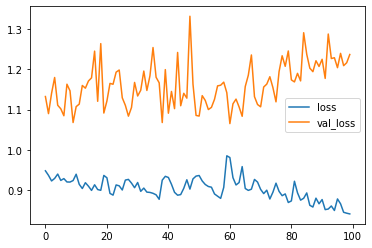

In [35]:
# plot accuracy per iteration

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
# 결과가 썩 좋지 않음,.,

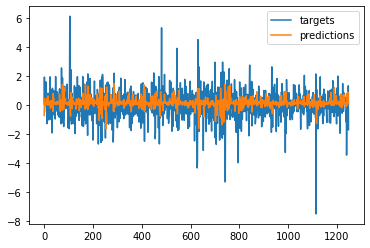

In [37]:
# One-step forecast using true targets (예측할 데이터 값)
predicts = model.predict(X)
predicts.shape
final_predictions = predicts[:, 0]

# forecast graph
plt.plot(Y, label = 'targets')
plt.plot(final_predictions, label = 'predictions')
plt.legend()
plt.show()

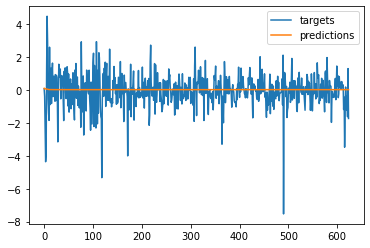

In [38]:
# Multi-step forecast(time sequences)
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]

# 진짜 데이터 수보다 많이 예측할 필요가 없으니까,,
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0, 0]
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1) # time sequences
    last_x[-1] = p
    
# forecast graph
plt.plot(validation_target, label = 'targets')
plt.plot(validation_predictions, label = 'predictions')
plt.legend()
plt.show()

In [39]:
# Now turn the full data into numpy arrays

# Not yet in the final "X" format
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['return'].values

In [51]:
input_data.shape

(1259, 5)

In [40]:
# Now make the actual data which will go into the nerual network
T = 10 # the number of time atape to look at to make a prediction for the next day
D = input_data.shape[1] # 5
N = len(input_data) - T # sequences data

In [42]:
# normalize the inputs
Ntrain = len(input_data) * 2 // 3 # 데이터의 2/3으로 나눔.
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T]) # sequences data여서 마지막 데이터 + 10여야 하니까.
input_data = scaler.transform(input_data)

In [45]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [46]:
# Setup X_test and Y_test
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N -Ntrain)

for u in range(N - Ntrain):
  # u counts from 0...(N-Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [47]:
# make the RNN
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [48]:
# train the RNN
# train the RNN
r = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_test, Y_test),
)

Epoch 1/300
27/27 [==============================] - 1s 16ms/step - loss: 0.6973 - accuracy: 0.4815 - val_loss: 0.6929 - val_accuracy: 0.4951
Epoch 2/300
27/27 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5209 - val_loss: 0.6947 - val_accuracy: 0.4878
Epoch 3/300
27/27 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.4994 - val_loss: 0.6948 - val_accuracy: 0.4854
Epoch 4/300
27/27 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5304 - val_loss: 0.6926 - val_accuracy: 0.5317
Epoch 5/300
27/27 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5221 - val_loss: 0.6923 - val_accuracy: 0.5293
Epoch 6/300
27/27 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5221 - val_loss: 0.6960 - val_accuracy: 0.4902
Epoch 7/300
27/27 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5328 - val_loss: 0.6966 - val_accuracy: 0.4878
Epoch 8/300


Epoch 59/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6667 - accuracy: 0.5840 - val_loss: 0.7038 - val_accuracy: 0.4902
Epoch 60/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.5912 - val_loss: 0.7065 - val_accuracy: 0.4878
Epoch 61/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6632 - accuracy: 0.5828 - val_loss: 0.7081 - val_accuracy: 0.4805
Epoch 62/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6654 - accuracy: 0.5840 - val_loss: 0.7125 - val_accuracy: 0.4976
Epoch 63/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.5876 - val_loss: 0.7104 - val_accuracy: 0.4927
Epoch 64/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6596 - accuracy: 0.5971 - val_loss: 0.7079 - val_accuracy: 0.4976
Epoch 65/300
27/27 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.5852 - val_loss: 0.7126 - val_accuracy: 0.4854
Epoch 

27/27 [==============================] - 0s 4ms/step - loss: 0.5705 - accuracy: 0.6639 - val_loss: 0.7745 - val_accuracy: 0.4756
Epoch 117/300
27/27 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.6806 - val_loss: 0.7914 - val_accuracy: 0.4902
Epoch 118/300
27/27 [==============================] - 0s 4ms/step - loss: 0.5608 - accuracy: 0.6996 - val_loss: 0.7773 - val_accuracy: 0.4829
Epoch 119/300
27/27 [==============================] - 0s 4ms/step - loss: 0.5543 - accuracy: 0.6782 - val_loss: 0.7757 - val_accuracy: 0.4780
Epoch 120/300
27/27 [==============================] - 0s 4ms/step - loss: 0.5551 - accuracy: 0.6841 - val_loss: 0.7777 - val_accuracy: 0.4829
Epoch 121/300
27/27 [==============================] - 0s 4ms/step - loss: 0.5494 - accuracy: 0.6877 - val_loss: 0.7833 - val_accuracy: 0.4634
Epoch 122/300
27/27 [==============================] - 0s 4ms/step - loss: 0.5537 - accuracy: 0.6830 - val_loss: 0.7798 - val_accuracy: 0.4707
Epoch 123/300

27/27 [==============================] - 0s 4ms/step - loss: 0.4363 - accuracy: 0.7938 - val_loss: 0.9055 - val_accuracy: 0.4756
Epoch 174/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4367 - accuracy: 0.7890 - val_loss: 0.9066 - val_accuracy: 0.4854
Epoch 175/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4289 - accuracy: 0.7783 - val_loss: 0.9208 - val_accuracy: 0.4805
Epoch 176/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4288 - accuracy: 0.7998 - val_loss: 0.8939 - val_accuracy: 0.4902
Epoch 177/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8057 - val_loss: 0.9457 - val_accuracy: 0.4732
Epoch 178/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4135 - accuracy: 0.8069 - val_loss: 0.9257 - val_accuracy: 0.4829
Epoch 179/300
27/27 [==============================] - 0s 5ms/step - loss: 0.4197 - accuracy: 0.7998 - val_loss: 0.9144 - val_accuracy: 0.4878
Epoch 180/300

27/27 [==============================] - 0s 4ms/step - loss: 0.3117 - accuracy: 0.8594 - val_loss: 1.0702 - val_accuracy: 0.4951
Epoch 231/300
27/27 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.8653 - val_loss: 1.1509 - val_accuracy: 0.4732
Epoch 232/300
27/27 [==============================] - 0s 4ms/step - loss: 0.3031 - accuracy: 0.8605 - val_loss: 1.0789 - val_accuracy: 0.4878
Epoch 233/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2974 - accuracy: 0.8713 - val_loss: 1.1272 - val_accuracy: 0.4756
Epoch 234/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2968 - accuracy: 0.8629 - val_loss: 1.0908 - val_accuracy: 0.5000
Epoch 235/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2945 - accuracy: 0.8617 - val_loss: 1.1023 - val_accuracy: 0.4951
Epoch 236/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2955 - accuracy: 0.8582 - val_loss: 1.1204 - val_accuracy: 0.4878
Epoch 237/300

27/27 [==============================] - 0s 4ms/step - loss: 0.2104 - accuracy: 0.9046 - val_loss: 1.4111 - val_accuracy: 0.4780
Epoch 288/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2105 - accuracy: 0.9166 - val_loss: 1.3437 - val_accuracy: 0.4805
Epoch 289/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2092 - accuracy: 0.9082 - val_loss: 1.4438 - val_accuracy: 0.4854
Epoch 290/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2038 - accuracy: 0.9094 - val_loss: 1.3961 - val_accuracy: 0.4829
Epoch 291/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2021 - accuracy: 0.9118 - val_loss: 1.3666 - val_accuracy: 0.4902
Epoch 292/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2037 - accuracy: 0.9166 - val_loss: 1.4487 - val_accuracy: 0.4683
Epoch 293/300
27/27 [==============================] - 0s 4ms/step - loss: 0.1990 - accuracy: 0.9130 - val_loss: 1.4176 - val_accuracy: 0.4854
Epoch 294/300

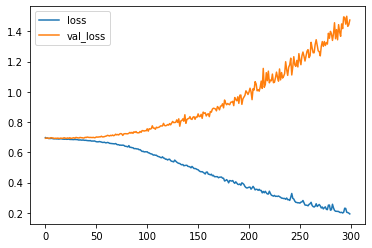

In [49]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

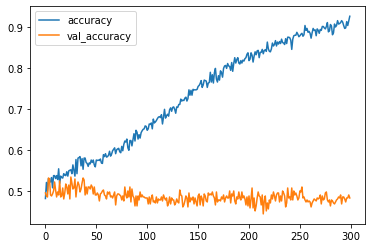

In [50]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()